In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\patil\Downloads\SA2021_W4_Music.csv')
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.380000e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455789,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130863e-03,2712.581883,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [5]:
data.shape

cols = [col for col in data.columns if 'label' in col]
data.label.value_counts()


pop          1000
blues        1000
metal        1000
jazz         1000
reggae       1000
disco         999
classical     998
rock          998
hiphop        998
country       997
Name: label, dtype: int64

In [6]:
cols = [col for col in data.columns if 'mean' in col]
corr = data[cols].corr()
corr.style.background_gradient(cmap='GnBu')

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
chroma_stft_mean,1.000000,0.424706,0.534670,0.464617,0.526881,0.457080,0.034305,-0.109303,0.573974,-0.513978,0.013981,0.213522,0.069027,0.342903,0.112848,0.423220,0.155357,0.376734,0.108459,0.400529,-0.036171,0.297993,-0.078784,0.228293,-0.103968,0.168254,-0.062985,0.193666
rms_mean,0.424706,1.000000,0.470781,0.495142,0.500178,0.293745,0.065134,-0.012401,0.795000,-0.453606,0.136936,-0.034473,0.122941,0.072916,0.181207,0.134868,0.213195,0.144650,0.133593,0.134779,0.043769,0.113960,0.012184,0.055563,-0.013952,0.087615,0.024552,0.082251
spectral_centroid_mean,0.534670,0.470781,1.000000,0.890382,0.974360,0.865487,0.050559,-0.004654,0.686196,-0.931435,0.195977,-0.165793,0.078506,-0.027122,0.196388,0.088172,0.260035,0.146238,0.144027,0.118541,0.058537,0.118186,0.035098,0.116866,0.026879,0.177934,0.018651,0.191512
spectral_bandwidth_mean,0.464617,0.495142,0.890382,1.000000,0.951000,0.577015,0.064358,0.017851,0.615946,-0.887156,0.515133,-0.298786,0.314642,-0.094698,0.375831,-0.002155,0.385406,0.031015,0.277708,0.004485,0.199991,0.025717,0.125946,0.012459,0.089523,0.084331,0.074453,0.133895
rolloff_mean,0.526881,0.500178,0.974360,0.951000,1.000000,0.755442,0.051363,-0.011073,0.688779,-0.923652,0.308917,-0.182640,0.137204,-0.006269,0.234987,0.095158,0.287332,0.140193,0.167872,0.110553,0.087349,0.109308,0.042899,0.098611,0.035871,0.158802,0.033071,0.182626
zero_crossing_rate_mean,0.457080,0.293745,0.865487,0.577015,0.755442,1.000000,0.021418,-0.027739,0.590236,-0.739485,-0.167604,-0.044847,-0.183668,0.019753,-0.039442,0.140365,0.052420,0.220265,-0.040104,0.190734,-0.112906,0.174409,-0.073881,0.196571,-0.053256,0.233676,-0.058103,0.211582
harmony_mean,0.034305,0.065134,0.050559,0.064358,0.051363,0.021418,1.000000,0.546123,0.026708,-0.041915,0.053061,-0.061991,0.074815,-0.106517,0.072796,-0.059041,0.054333,-0.050178,0.038731,-0.069008,0.046471,-0.054840,0.054587,-0.086724,0.008767,-0.061114,0.038825,-0.036651
perceptr_mean,-0.109303,-0.012401,-0.004654,0.017851,-0.011073,-0.027739,0.546123,1.000000,-0.093169,0.032616,0.115828,-0.210213,0.088334,-0.226526,0.080452,-0.206558,0.094026,-0.174491,0.095192,-0.154480,0.108342,-0.106998,0.135161,-0.165075,0.055817,-0.080387,0.073268,-0.075263
mfcc1_mean,0.573974,0.795000,0.686196,0.615946,0.688779,0.590236,0.026708,-0.093169,1.000000,-0.612310,-0.086338,0.040875,-0.079129,0.153723,0.031010,0.256378,0.061538,0.269785,0.000314,0.247536,-0.127468,0.173863,-0.152374,0.131637,-0.165295,0.145346,-0.106033,0.131098
mfcc2_mean,-0.513978,-0.453606,-0.931435,-0.887156,-0.923652,-0.739485,-0.041915,0.032616,-0.612310,1.000000,-0.273366,0.061804,-0.154083,-0.061134,-0.242909,-0.158884,-0.286309,-0.176950,-0.186252,-0.138877,-0.108140,-0.152560,-0.067593,-0.131528,-0.039512,-0.165099,-0.017996,-0.173734


In [7]:
corr['harmony_mean']

chroma_stft_mean           0.034305
rms_mean                   0.065134
spectral_centroid_mean     0.050559
spectral_bandwidth_mean    0.064358
rolloff_mean               0.051363
zero_crossing_rate_mean    0.021418
harmony_mean               1.000000
perceptr_mean              0.546123
mfcc1_mean                 0.026708
mfcc2_mean                -0.041915
mfcc3_mean                 0.053061
mfcc4_mean                -0.061991
mfcc5_mean                 0.074815
mfcc6_mean                -0.106517
mfcc7_mean                 0.072796
mfcc8_mean                -0.059041
mfcc9_mean                 0.054333
mfcc10_mean               -0.050178
mfcc11_mean                0.038731
mfcc12_mean               -0.069008
mfcc13_mean                0.046471
mfcc14_mean               -0.054840
mfcc15_mean                0.054587
mfcc16_mean               -0.086724
mfcc17_mean                0.008767
mfcc18_mean               -0.061114
mfcc19_mean                0.038825
mfcc20_mean               -0

<AxesSubplot:xlabel='label', ylabel='count'>

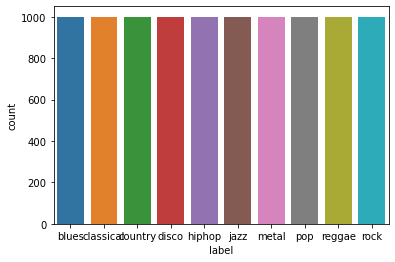

In [8]:
# Cell to plot countplot.
sns.countplot(x='label', data=data)

<AxesSubplot:>

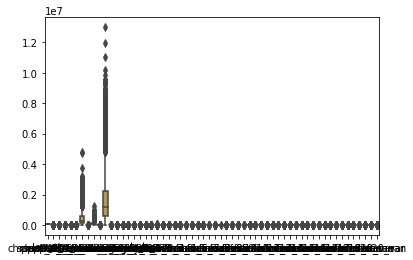

In [9]:
sns.boxplot(data=data)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [11]:
data.head(1)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.6309,1972.744388,117335.7716,3714.560359,...,39.687145,-3.24128,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues


In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("SHAPE:",data.shape)

y = data['label']
X = data.loc[:, data.columns != 'label']

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)
print(IQR)

SHAPE: (3442, 59)
length                     0.000000e+00
chroma_stft_mean           1.267458e-01
chroma_stft_var            1.125938e-02
rms_mean                   9.254559e-02
rms_var                    2.516273e-03
spectral_centroid_mean     1.081902e+03
spectral_centroid_var      4.392191e+05
spectral_bandwidth_mean    7.008847e+02
spectral_bandwidth_var     1.098018e+05
rolloff_mean               2.213323e+03
rolloff_var                1.702886e+06
zero_crossing_rate_mean    6.545880e-02
zero_crossing_rate_var     2.430199e-03
harmony_mean               1.419452e-04
harmony_var                1.321647e-02
perceptr_mean              5.994160e-04
perceptr_var               6.414058e-03
tempo                      4.019531e+01
mfcc1_mean                 1.315771e+02
mfcc1_var                  2.550033e+03
mfcc2_mean                 4.621918e+01
mfcc2_var                  5.028721e+02
mfcc3_mean                 3.282863e+01
mfcc3_var                  3.128226e+02
mfcc4_mean            

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.1, random_state=42)

In [88]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print('Confusion Matrix \n', confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [89]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.74493 



In [90]:
# AdaBoostClassifier
adabst = AdaBoostClassifier( n_estimators=1000,random_state=0)
score(adabst, "AdaBoostClassifier")

Accuracy for AdaBoostClassifier : 0.32464 



In [96]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rfc, "RandomForestClassifier")

Accuracy for RandomForestClassifier : 0.84348 



In [93]:
# XGBClassifier
xgb =  XGBClassifier( n_estimators=1000, learning_rate=0.05)
score(xgb, " XGBClassifier")

[16:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for  XGBClassifier : 0.87246 



In [70]:
print(confusion_matrix(y_test,xgb.predict(X_test)))

[[31  0  3  1  0  1  1  0  0  0]
 [ 0 17  2  0  0  0  0  0  0  0]
 [ 2  0 48  2  0  4  0  0  0  1]
 [ 0  0  2 48  1  0  0  0  0  0]
 [ 0  0  1  0 26  0  0  0  0  1]
 [ 0  0  4  0  0 26  0  0  0  0]
 [ 0  0  0  0  1  1 37  0  0  1]
 [ 0  1  1  2  0  0  0 15  0  0]
 [ 0  0  2  0  1  0  0  0 18  0]
 [ 1  0  0  3  0  1  2  0  1 35]]


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

       blues       0.91      0.84      0.87        37
   classical       0.94      0.89      0.92        19
     country       0.76      0.84      0.80        57
       disco       0.86      0.94      0.90        51
      hiphop       0.90      0.93      0.91        28
        jazz       0.79      0.87      0.83        30
       metal       0.93      0.93      0.93        40
         pop       1.00      0.79      0.88        19
      reggae       0.95      0.86      0.90        21
        rock       0.92      0.81      0.86        43

    accuracy                           0.87       345
   macro avg       0.90      0.87      0.88       345
weighted avg       0.88      0.87      0.87       345



In [77]:
iqr1 = data.harmony_mean.quantile(0.75) - data.harmony_mean.quantile(0.25)

ll1 = data.harmony_mean.quantile(0.25) - 1.5*iqr1
ul1 = data.harmony_mean.quantile(0.25) + 1.5*iqr1

data.harmony_mean[(data.harmony_mean<ll1) | (data.harmony_mean>ul1)].count()

685

In [78]:
iqr2 = data.zero_crossing_rate_var.quantile(0.75) - data.zero_crossing_rate_var.quantile(0.25)

ll2 = data.zero_crossing_rate_var.quantile(0.25) - 1.5*iqr2
ul2 = data.zero_crossing_rate_var.quantile(0.25) + 1.5*iqr2

data.zero_crossing_rate_var[(data.zero_crossing_rate_var<ll2) | (data.zero_crossing_rate_var>ul2)].count()

515

In [79]:
iqr3 = data.perceptr_mean.quantile(0.75) - data.perceptr_mean.quantile(0.25)

ll3 = data.perceptr_mean.quantile(0.25) - 1.5*iqr3
ul3 = data.perceptr_mean.quantile(0.25) + 1.5*iqr3

data.perceptr_mean[(data.perceptr_mean<ll3) | (data.perceptr_mean>ul3)].count()

942

In [80]:
iqr4 = data.rms_var.quantile(0.75) - data.rms_var.quantile(0.25)

ll4 = data.rms_var.quantile(0.25) - 1.5*iqr4
ul4 = data.rms_var.quantile(0.25) + 1.5*iqr4

data.rms_var[(data.rms_var<ll4) | (data.rms_var>ul4)].count()

511

In [81]:
def outlier(col):
    iqr = data[col].quantile(0.75) -  data[col].quantile(0.25)

    ll4 =  data[col].quantile(0.25) - 1.5*iqr
    ul4 =  data[col].quantile(0.25) + 1.5*iqr
    print('No of outlier in ',col,' = ',data[col][( data[col]<ll4) | ( data[col]>ul4)].count())

In [82]:
outlier('harmony_mean')
outlier('zero_crossing_rate_var')
outlier('perceptr_mean')
outlier('rms_var')

No of outlier in  harmony_mean  =  685
No of outlier in  zero_crossing_rate_var  =  515
No of outlier in  perceptr_mean  =  942
No of outlier in  rms_var  =  511
